# Exercise 10-1: Create a linear regression

## Get the data

Importing libraries, modules, and functions; which are `pandas, seaborn, LinearRegression,` and `train_test_split` from `sklearn`.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Caling `read_csv()` from *Pandas* lib, to read the `Fish.csv` file and assign the data to a variable, `fish`.

In [2]:
fish = pd.read_csv('Fish.csv')

Caling `head()` function to display the head data of `fish`.

In [3]:
fish.head() # to check the data

,Species,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Clean the data
This dataset has columns called `Length1`, `Length2`, and `Length3`, renaming these to `VerticalLength`, `DiagonalLength`, and `CrossLength`. 

Python Code Explain:
- Creating a variable, `new_names`, to assign the `Length` columns to their new names.<br>
- Calling `rename(column)` to rename to columns.<br>
- Calling `to_csv()` to save back to the original file, `Fish.csv`, and set `index=False` to prevent save as a column.

In [4]:
# read the info.txt file and rename the Length columns so they're more descriptive
new_names = {
    'Length1': 'VerticalLength',
    'Length2': 'DiagonalLength',
    'Length3': 'CrossLength'
}
# Rename the columns
fish = fish.rename(columns=new_names)

`to_csv()` saves the changes in `fish` back to the **'Fish.csv'**.

In [5]:
# fish.to_csv('Fish.csv', index=False) # Save back to CSV file

In [6]:
fish.head() # to check my coding by displaying the col's names

,Species,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Identify a correlation
Selecting only numerical data for correlation

In [7]:
# get the correlation data for the Weight column and fish_numeric (which is defined for you below)

In [8]:
fish_numeric = fish[['Weight','VerticalLength','DiagonalLength','CrossLength','Height','Width']]

### Correlation Matrix
Calling `corr()` and the **Weight** column to get the correlation data.<br>
Calling `sort_value()` to sort the values by **Weigth** in descending order.

In [9]:
fish_numeric.corr()[['Weight']].sort_values(by='Weight', ascending=False)
# fish_numeric.corr() # correlation marix of all variables in fish_numeric

,Weight
Weight,1.000000
CrossLength,0.923044
DiagonalLength,0.918618
VerticalLength,0.915712
Width,0.886507
Height,0.724345


**Interpretation of Correlation Matrix**<br>
With the value range from -1 to 1, -1 means negative relationship and 1 means positive relationship.<br>
Since the first row is between `Weight` and itself, it can be ignored.<br>
`CrossLength, DiagonalLength,` and `VerticalLength` have very strong positive relationships with `Weight` since all 3 score above `0.92`.<br>
While both `Width` and `Height` have positive relationship with `Weight`, they're not as significant as the other 3.<br>Since all veriables in `fish_numeric`, except for `Weight`, have positive relationships with `Weight`, then `Weight` tends to increase when one of the variables increase. 

### Heatmap 
Calling `heatmap()` from the *Seaborn* lib to create a heatmap for the correlation data.<br>
The `heatmap()` is created using the `fish_numeric.corr()` data with the correlation range from -1 to 1.<br>
`annot` is set to `True` to display the values of each cell.<br>
`set()` is used to set the title for this graph.

[Text(0.5, 1.0, 'Heatmap for the Correlation Data')]

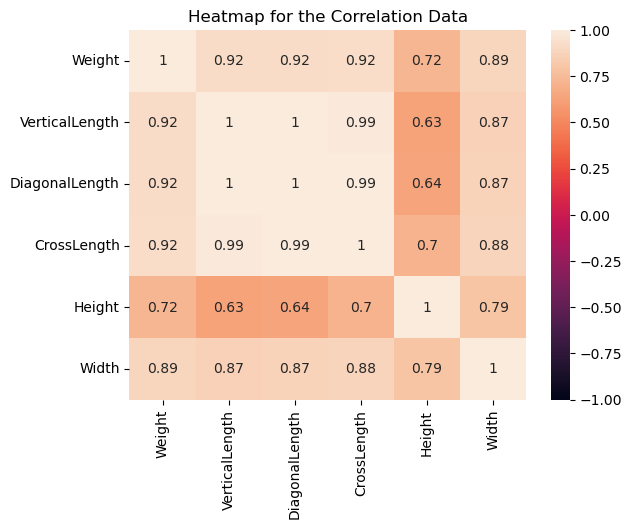

In [10]:
# create a heatmap for the correlation data (Use data=fish_numeric.corr())
sns.heatmap(data=fish_numeric.corr(), vmin=-1.0, vmax=1.0, annot=True).set(title='Heatmap for the Correlation Data')

**Interpretation for Heatmap**<br>
The heatmap displays the relationship between all variables of `fish_numeric`.<br>
The lighter the color, the more positive and stronger the relationship is.<br>
For example, the relationship between `Weight` and `Height` is not as strong as `Weight` and `VeritcalLength`<br>

### Scatterplot
Calling the `replot()` from the *SeaBorn* lib to create a scatterplot, with `x` as `Weight` and `y` as `VerticalLength`.

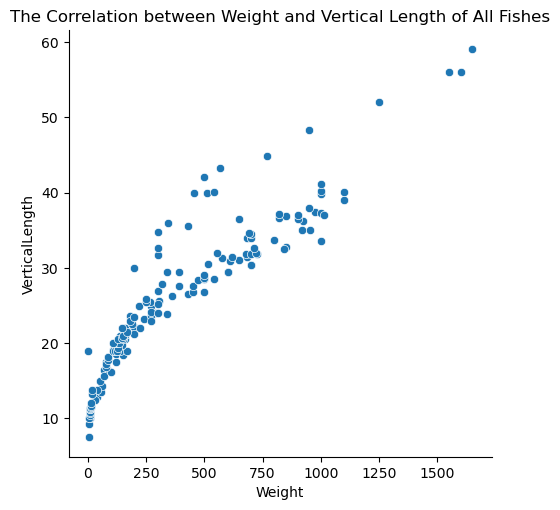

In [11]:
# use a scatterplot to plot the correlation between weight and vertical length for all fish
sns.relplot(data=fish_numeric, x='Weight',y='VerticalLength').set(
    title='The Correlation between Weight and Vertical Length of All Fishes')
# sns.relplot(data=fish_numeric, x='VerticalLength',y='Weight')
# print('Finish Scatterplot')

**Interpretation for Scatterplot between Weight and Vertical Length of All Fishes**<br>
The scatterplot displays a positive and non-linear plot. 

Using the parameter, `hue`, and assigning to `Species` to identify each species of fish with colors.

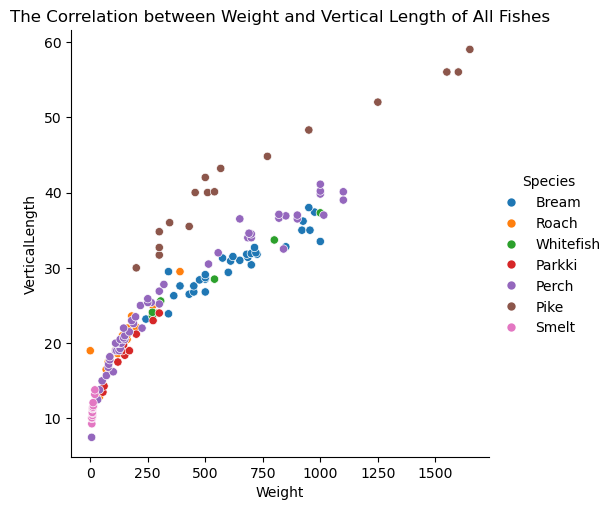

In [12]:
# create the same scatterplot as the previous cell, but use color to identify each species
sns.relplot(data=fish, x='Weight', y='VerticalLength', hue='Species').set(
    title='The Correlation between Weight and Vertical Length of All Fishes')

**Interpretation of Scatterplot between Weight and Vertical Length of All Fishes**<br>
The scatterplot displays a positive and non-linear plot, now with each species colored.

There are 2 methods to display the plot using the `replot()` in *SeaBorn* lib:<br>
`data=fish[fish['Species']=='Bream']`: in the `fish` data, only selecting rows contains`Bream` in the `Species` column.<br>
`x='Weight'`: assigning `Weight` to `x`,<br>
`y='VerticalLength'`: assigning `VerticalLength` to `y`,<br>
`hue='Species'`: display the species clearer with color,<br>
`set(title=)`: setting the title of the plot.

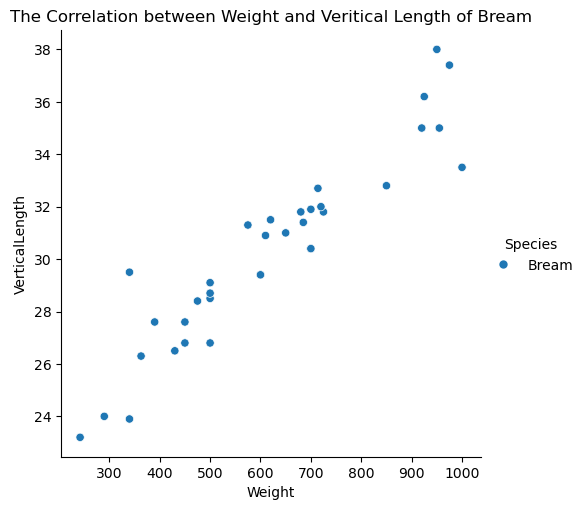

In [13]:
# create the same scatterplot as the previous cell, but only display data for the Bream species

# bream=fish[fish['Species']=='Bream'] #defining the Bream species, method1

sns.relplot(data=fish[fish['Species']=='Bream'], x='Weight', y='VerticalLength', hue='Species').set(
    title='The Correlation between Weight and Veritical Length of Bream') #plotting with the Bream species, method2

**Interpretation of Scatterplot between Weight and Vertical Length of Bream Fish Species**<br>
The data creates a positive linear line of this type of fish species despise some scatters. 

## Create a linear model

In [14]:
# filter the data so it only contains the values for the Bream species 
# and assign the resulting DataFrame to a variable named bream (Hint: you will need to use .query() function)

Calling `query()` to get only the values of **Bream** in the **Species** columns and assigning that data to `bream`

In [15]:
bream=fish.query('Species=="Bream"')
# bream #displaying bream

In [16]:
# split the training and testing data (Hint: Use train_test_split() function)

In [17]:
""" Already have at the top """
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

' Already have at the top '

Splitting `Bream` into traning and testing sets using `train_test_split()`<br>
`bream[['VerticalLength']]` extracts the `VerticalLength` column from `Bream` and be used as independent variable.<br>
`bream[['Weight']]` extracts the `Weight` column from `Bream` and be used as dependent variable.<br>
`test_size=0.33` 33% of the splitted data will be used for testing.<br>
`random_state=42` sets a random seed to ensure the data is reproducibly. <br>
`x_train` contains the `VerticalLength` values for training set.<br>
`x_test` contains the `VerticalLength` values for testin set.<br>
`y_train` contains the `Weight` values for training set.<br>
`y_test` contains the `Weight` values for testing set.<br>

In [18]:
x_train, x_test, y_train, y_test = train_test_split( 
    bream[['VerticalLength']], bream[['Weight']], 
    test_size=0.33, random_state=42)
# print(f'VerticalLength', x_test)
# print(f'Weight', y_test)

In [19]:
# create the model and fit the training data (Hint: To create use LinearRegression() and to fit use .fit() )

Creating an instance of `LinearRegression()`, `linearModel`.<br>
By calling, `fit()`, the model learns/trains the coefficients that best fit a straight line through the training data points.<br>
The training data are in `x_train` and `y_train`.

In [20]:
''' create the model from the training dataset '''
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)

LinearRegression()

Calling `score(x_test, y_test)` to find the R-Squared, which is to evaluate the performance of the model `linearModel` on the testing data; `x_test` and `y_test`. 

In [21]:
# score the testing data (Hint: Use .score())
''' validate the model with the test dataset '''
print(f'R-Squared = {linearModel.score(x_test, y_test)}')

R-Squared = 0.7320810839045929


**Interpretation of The R-Squared** 
The R-Squared is range from 0 to 1 and since the R-Squared is about **0.7321** means there is about 73.21% of the of the variance in `Weight` based on `VerticalLength`. Which the model, `linearModel`, is able to capture a significant portion of the relationship between these two variables.

Calling `preditct(x_test)` and the trained model, `linearModel`, to make predictions on the testing data, `x_test`, and store them inside an array, `y_predicted`. 

In [22]:
# make the predictions (Hint: Use .predict() save results of this to y_predicted)
# use the model to make predictions
y_predicted = linearModel.predict(x_test)
y_predicted

array([[707.19217491],
       [576.26557794],
       [701.95511103],
       [675.76979164],
       [571.02851407],
       [785.7481331 ],
       [654.82153613],
       [555.31732243],
       [476.76136425],
       [623.39915285],
       [523.89493916],
       [989.99362437]])

After the trained model, `linearModel`, applies its calculations based on **VerticalLength**, it stores the predictions for **Weight** inside `y_predicted`.

## Plot the regression line

In [23]:
# join the predicted data with the original data

Calling `DataFrame()`, putting the preditcted **Weight** from the `y_predicted` array to a column, `PredictedWeight` and assigning to a dateframe, `predicted`. 

Calling `join()`, the `PredictedWeight` with `x_test` and `y_test`. Resets the index of the `x_test` and `y_test`, dropping the existing index to avoid conflicts during joining.
Then assigning them to `final`.

In [24]:
predicted = pd.DataFrame(y_predicted, columns = ['PredictedWeight'])
# predicted # Displaying predicted with PredictedWeight

'''
    Complining the test data with the predicted data.
        predicted: PredictedWeight,
        x_test: VerticalLength,
        y_test: Weight
'''
final = predicted.join([x_test.reset_index(drop=True),
                        y_test.reset_index(drop=True)])
final.head() #displaying head of the newly combination. 

,PredictedWeight,VerticalLength,Weight
0,707.192175,32.0,720.0
1,576.265578,29.5,340.0
2,701.955111,31.9,700.0
3,675.769792,31.4,685.0
4,571.028514,29.4,600.0


Calling `rename()` to rename **Weight** to **ActualWeight**

In [25]:
# rename the Weight column to indicate that it stores actual values, not predicted values
print(f'Before name changing\n {final.head()}')
final = final.rename(columns={'Weight':'ActualWeight'}) # PredictedWeight, VerticalLength, ActualWeight
print(f'After name changing\n {final.head()}')

Before name changing
    PredictedWeight  VerticalLength  Weight
0       707.192175            32.0   720.0
1       576.265578            29.5   340.0
2       701.955111            31.9   700.0
3       675.769792            31.4   685.0
4       571.028514            29.4   600.0
After name changing
    PredictedWeight  VerticalLength  ActualWeight
0       707.192175            32.0         720.0
1       576.265578            29.5         340.0
2       701.955111            31.9         700.0
3       675.769792            31.4         685.0
4       571.028514            29.4         600.0


In [26]:
# melt the actual and predicted data (All thats needed here is for you to fill
# in the missing values that go inside the value_vars. Look and see for 
# yourself, value_vars is an empty list right now. Which column names go 
# inside of it? Everything else is already done for you)
finalMelt = pd.melt(final, id_vars=['VerticalLength'], 
                    value_vars=['ActualWeight','PredictedWeight'], 
                    var_name='Variable', value_name='Value')
finalMelt.head() #Displaying the head rows of finalMelt

,VerticalLength,Variable,Value
0,32.0,ActualWeight,720.0
1,29.5,ActualWeight,340.0
2,31.9,ActualWeight,700.0
3,31.4,ActualWeight,685.0
4,29.4,ActualWeight,600.0


Calling `melt()` from the *Pandas* lib with the input data is `final`, `VerticalLength` becomes the variable id, `ActualWeight` and `PredictedWeight` are melted into a single column, `Variable`. The `Value` column stores the values of `ActualWeight` and `PredictedWeight` correspondingly. Finally, assigning them to a variable called `finalMelt`.

In [27]:
# finalMelt # Displaying the content of finalMelt

In [28]:
# use relplot() to plot the actual and predicted data (Hint: the data parameter 
# should be set like this data=finalMelt, and x='VerticalLength', y='Value', 
# hue='Variable')

Calling `replot()` in SeaBorn lib:<br>
`data=finalMelt`: using the data in finalMelt,<br>
`x='VerticalLength'`: assigning **VerticalLength** to x,<br>
`y='Value'`: assigning **Value** to y,<br>
`hue='Species'`: display the variables in `finalMelt` clearer with color,<br>
`set(title=)`: setting the title of the plot.

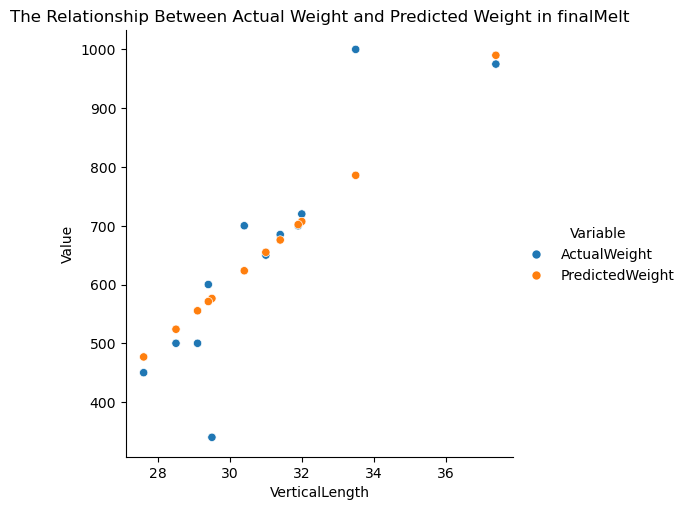

In [29]:
sns.relplot(data=finalMelt, x='VerticalLength', y='Value', hue='Variable').set(
    title='The Relationship Between Actual Weight and Predicted Weight in finalMelt')

### Interpreting
From the plot, some of the predicted values are closed to the actual values, while some are not. Moreover, the actual values looks scattered with a few outliers while the predicted values looks like it's create a poisive linear line. Overall, this is a good fit. 

In [30]:
# use lmplot() to produce a similar result (Hint: set your parameters like this data=bream, x='VerticalLength', y='Weight')
# NOTE: Notice the DataFrame named bream is used with this method

Calling `lmplot()` in *SeaBorn* lib:<br>
`data=bream`: using the data in `bream`,<br>
`x='VerticalLength'`: assigning `VerticalLength` to x,<br>
`y='Weight'`: assigning `Weight` to y,<br>
`line_kws={'color':'red'}`: display the linear in red colr,<br>
`set(title=)`: setting the title of the plot.

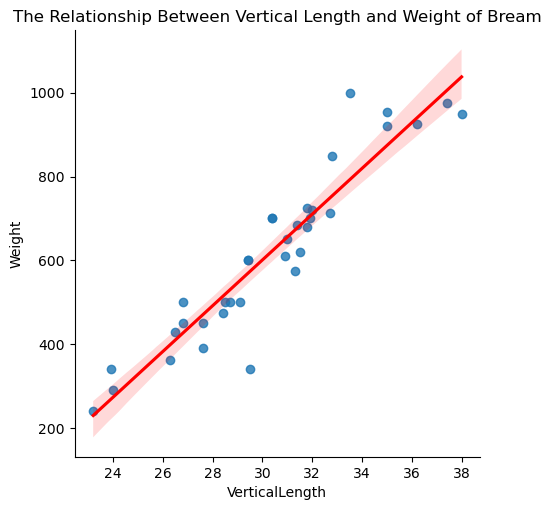

In [31]:
sns.lmplot(data=bream,x='VerticalLength', y='Weight', line_kws={'color':'red'}).set(
    title='The Relationship Between Vertical Length and Weight of Bream') #plotting a linear regression

The linear regression line has a positive correlation which confirm a positive relationship between weigth and vertical length, as vertical length increases, weight tends increase. There are some scattered outliers around the line. The confidence interval is narrowed at the middle of the line and large at both ends of the line. This suggests that the model is more confident in its predictions for intermediate values of "VerticalLength" compared to the extremes.

## Plot the residuals

In [32]:
# calculate the residuals and store them in a column

Adding another column, `residual`, to the `final`, by subtracting `ActualWeight` to `PredictedWeight`

In [33]:
final['residuals'] = final['ActualWeight']-final['PredictedWeight']
final.head()

,PredictedWeight,VerticalLength,ActualWeight,residuals
0,707.192175,32.0,720.0,12.807825
1,576.265578,29.5,340.0,-236.265578
2,701.955111,31.9,700.0,-1.955111
3,675.769792,31.4,685.0,9.230208
4,571.028514,29.4,600.0,28.971486


These residuals are the differences between the actual values and the predicted values from the model. They represent the errors or "leftovers" that the model couldn't explain.

In [34]:
# use relplot() to create a scatterplot for the residuals

Calling `replot()`, it takes data from `final`, `VerticalLength` as `x` and `residuals` as `y`. Then assign the plot to `g`<br>
Using a `for` loop to create a horizontal dashed line at `y = 0`.<br>
`set(title=)`: setting the title for the plot

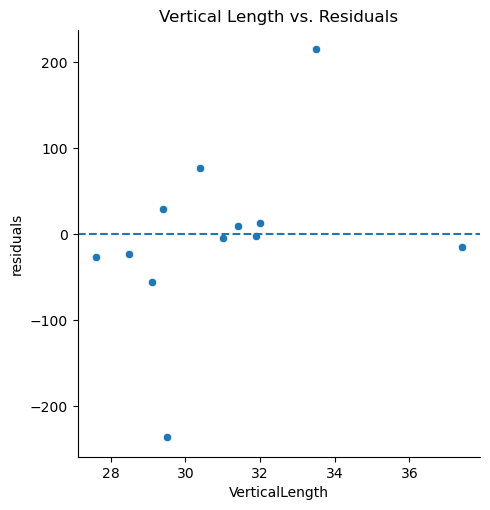

In [35]:
g=sns.relplot(data=final, x='VerticalLength', y='residuals').set(title='Vertical Length vs. Residuals')
# draw a horizontal line where the Y axis is 0
for ax in g.axes.flat:    
    ax.axhline(0, ls='--')

### Interpreting plot: *Vertical Length vs. Residuals*
Based on my observations, the residual plot suggests that the linear regression model is a reasonable fit for the data. The random scatter and lack of a clear pattern in the residuals indicate that the model's assumptions are likely met. However, the presence of a few outliers might warrant further investigation to ensure that they are not unduly influencing the model's results.


In [36]:
# use residplot() to produce a similar result
# NOTE: use the DataFrame named bream with this method

Calling `residplot()` in *SeaBorn* lib:<br>
`data=bream`: using the data in `bream`,<br>
`x='VerticalLength'`: assigning `VerticalLength` to x,<br>
`y='Weight'`: assigning `Weight` to y,<br>
`set(title=)`: setting the title of the plot.

[Text(0.5, 1.0, 'Residuals of Bream')]

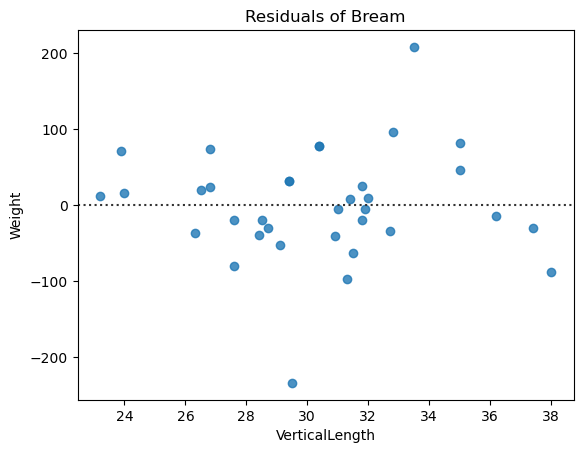

In [37]:
sns.residplot(data=bream, x='VerticalLength', y='Weight').set(
    title='Residuals of Bream')

### Interpreting Plot: *Residuals of Bream*
The values appear randomly and lack of pattern, which generally indicates the linear model is appropriate for the data. There're also clusters of values around `VerticalLength` values between 26 and 34, and few outliers at higher values. This suggests there may be changing variance.<br> Based on my observations, the residual plot suggests that the linear regression model is a reasonable fit for the data. However, it might not fully capture the relationship between `VerticalLength` and `Weight`, especially considering the presense of outliers and potential variance issues.

## Others

Let's find some outliers of the Bream species

In [38]:
bream.head()

,Species,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [39]:
Q1 = bream['Weight'].quantile(0.25)
Q3 = bream['Weight'].quantile(0.75)
IQR = Q3 - Q1 # this is also Q2

l = Q1 - 1.5 * IQR # lower bound
h = Q3 + 1.5 * IQR # upper bound

In [40]:
bream[bream['Weight'] < l]

,Species,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width


In [41]:
bream[bream['Weight'] > h]

,Species,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width


Nothing is shown means no outliers for **Weights**

In [42]:
q1 = bream['VerticalLength'].quantile(0.25)
q3 = bream['VerticalLength'].quantile(0.75)
iqr = q3 - q1 # this is also Q2

low = q1 - 1.5 * iqr # lower bound
high = q3 + 1.5 * iqr # upper bound

In [43]:
bream[bream['VerticalLength'] < low]

,Species,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width


In [44]:
bream[bream['VerticalLength'] > high]

,Species,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
34,Bream,950.0,38.0,41.0,46.5,17.6235,6.3705
